# Лабораторная работа №1
## Выполнил студент группы БВТ2101 Самат уулу Максат

### Оглавление
1. [Задание №1](#Задание-№1)
2. [Задание №2](#Задание-№2)
3. [Задание №3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [ ]:
print("Hello, World!")

Hello, World!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [ ]:
import random
import time

In [ ]:
user_m = int(input())
user_n = int(input())
user_min_limit = int(input())
user_max_limit = int(input())
user_m, user_n, user_min_limit, user_max_limit

7
5
0
200


(7, 5, 0, 200)

In [ ]:
def create_matrix(user_m, user_n, user_min_limit, user_max_limit):
  matrix = [[random.randrange(user_min_limit, user_max_limit) for y in range(user_n)] for x in range(user_m)]
  return matrix
#matrix

### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [ ]:
import copy
import math

matrix_original = create_matrix(50, 50, 0, 100)

In [ ]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый
# угол, после чего срез уменьшается и цикл повторяется.

matrix_x1 = copy.deepcopy(matrix_original)

start_time = time.time()

def choose(matrix):
  # Пустой массив для записи отсорированного массива (строки матрицы).
  sorted_list = []
  
  # Пробегаемся по строкам матрицы.
  for x in range(len(matrix)):

      # Пробегаемся по элементам строки матрицы.
      for j in range(len(matrix[x])):

          # Ставим макисмально возможное число, чтобы найти минимум.
          min_num = 2147483647

          # Пробегаемся по элементам строки матрицы, ищем минимальное число в ней.
          for i in matrix[x]:
              if min_num > i:
                  min_num = i
          sorted_list.append(min_num)
          matrix[x].remove(min_num)

          #print(sorted_list, '\t', matrix[x])

      matrix[x] = sorted_list
      sorted_list = []

choose(matrix_x1)
#print("matrix", matrix)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 9 ms ---


In [ ]:
# Сортировка вставкой.

matrix_x2 = copy.deepcopy(matrix_original)

start_time = time.time()

def inputing(matrix):
  for x in range(len(matrix)):
      sorted_list = []
      sorted_list.append(matrix[x][0])
      #print(matrix[x], end='\t')
      for i in range(1, len(matrix[x])):
          for j in range(len(sorted_list)):
              drug = True
              if matrix[x][i] < sorted_list[j]:
                  sorted_list.insert(j, matrix[x][i])
                  drug = False
                  break
                  
          if drug:
              sorted_list.append(matrix[x][i])
      matrix[x] = sorted_list
                
    #print(sorted_list, end='\n')

inputing(matrix_x2)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 7 ms ---


In [ ]:
# Сортировка обменом. || Сортировка пузырьком.

matrix_x3 = copy.deepcopy(matrix_original)

start_time = time.time()

def exchange(matrix):
  # Пробегаемся по строкам матрицы.
  for x in range(len(matrix)):

      # Флаг для остановки цикла. Сразу при запуске становится False, и, если
      # переставлять больше нечего, то цикл прекратится.
      drug = True
      while drug:
          drug = False

          # Пробегаемся по элементам строки матрицы.
          for i in range(len(matrix[x]) - 1):

              # Меняем местами, если они стоят неправильно.
              if matrix[x][i] > matrix[x][i+1]:
                  matrix[x][i], matrix[x][i+1] = matrix[x][i+1], matrix[x][i]
                  drug = True

    #print(matrix[x])

exchange(matrix_x3)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 36 ms ---


In [ ]:
# Сортировка Шелла.

matrix_x4 = copy.deepcopy(matrix_original)

start_time = time.time()

def shell(matrix):
  # Интервалы для сортировки Шелла. Эмпирическая последовательность Марцина Циура 
  d = [1750, 701, 301, 132, 57, 23, 10, 4, 1]

  # Пробегаемся по строкам матрицы.
  for x in range(len(matrix)):

      # Пробегаемся по интервалам.
      for delay in d:
          if delay < user_n:

              # Массив для записи отсорированного массива (строки матрицы).
              # В него записываем первый элемент.
              sorted_list = [matrix[x][0]]

              # Пробегаемся по элементам строки матрицы с заданным интервалом.
              for i in range(1, len(matrix[x]), delay):

                  # Сортировка вставками.
                  for j in range(len(sorted_list)):
                      drug = True
                      if matrix[x][i] < sorted_list[j]:
                          sorted_list.insert(j, matrix[x][i])
                          drug = False
                          break

                  if drug:
                      sorted_list.append(matrix[x][i])

      matrix[x] = sorted_list

shell(matrix_x4)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 10 ms ---


In [ ]:
# Быстрая сортировка.

matrix_x5 = copy.deepcopy(matrix_original)

start_time = time.time()


# Создаём функцию, чтобы рекурсивно выполнять её.
def q_sort(massiv, f, l):

    # Критерий для остановки рекурсии.
    if f >= l: return

    # Индекс начала.
    i = f

    # Индекс конца.
    j = l

    # Опорный элемент. Индексы начала и конца будут идти до него.
    opora = massiv[random.randint(f, l)]

    # Ищем числа, стоящие не на своём месте. Меняем их, сместив индексы.
    while i <= j:
        while massiv[i] < opora: i += 1
        while massiv[j] > opora: j -= 1

        if i <= j:
            massiv[j], massiv[i] = massiv[i], massiv[j]
            i += 1
            j -= 1

    # Выполняем те же операции, только с уменьшенным масивом. Идём с начала до j.
    q_sort(massiv, f, j)

    # Выполняем те же операции, только с уменьшенным масивом. Идём с i до конца.
    q_sort(massiv, i, l)

def quick_sort(matrix):
  for x in range(len(matrix)):
      q_sort(matrix[x], 0, user_n-1)

quick_sort(matrix_x5)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 1 ms ---


In [ ]:
# Турнирная сортировка.

matrix_x6 = copy.deepcopy(matrix_original)

start_time = time.time()

# Создаём функцию, чтобы рекурсивно выполнять её.
def piramyd_sort(massiv, n, sl):
    
    # Критерий для остановки рекурсии.
    if n <= 1: return
    
    # Глубина рекурсии.
    depth = int(math.log2(n))+1

    # Массив для хранения наименьшего числа.
    god_damn = massiv

    # Цикл разбивает элементы массива по парам.
    for m in range(depth):

        # Временный массив для записи.
        temp_massiv = []

        #print(god_damn)

        # Добавляем во временный массив минимальное число из пары.
        for i in range(0, len(god_damn) - 1, 2):
            temp_massiv.append(min(god_damn[i], god_damn[i+1]))

        # Учитываем то, что в кол-во элементов может быть нечётным.
        # Тогда просто создаём массив из числа, не попавшего в пару.
        if len(god_damn) % 2 != 0:
            temp_massiv.append(god_damn[-1])


        god_damn = temp_massiv

    sl.append(god_damn[-1])
    massiv.remove(god_damn[-1])
    piramyd_sort(massiv, len(massiv), sl)


def tournament(matrix):
  sorted_list = []

  for x in range(len(matrix)):
      # Пустой массив для записи отсорированного массива (строки матрицы).
      piramyd_sort(matrix[x], len(matrix), sorted_list)
      sorted_list.append(matrix[x][-1])
      matrix[x] = sorted_list
      #print(sorted_list)
  return sorted_list

tournament(matrix_x6) 

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 26 ms ---


In [ ]:
#Генерируем 6 Матриц от
vibor_time = []
vstavka_time = []
bubble_time = []
shell_time = []
quick_sort = []
tournir_sort = []
data = [5,10,25,50,75,100, 2000]
for i in data:
  time_matrix = create_matrix(i,i,0,100)
  matrix_vibor = copy.deepcopy(time_matrix)
  matrix_vstavka = copy.deepcopy(time_matrix)
  matrix_bubble = copy.deepcopy(time_matrix)
  matrix_shell = copy.deepcopy(time_matrix)
  matrix_quick_1 = copy.deepcopy(time_matrix)
  matrix_tournir = copy.deepcopy(time_matrix)

  start_time = time.time()
  choose(matrix_vibor)
  vibor_time.append((time.time() - start_time)*1000)

  start_time = time.time()
  inputing(matrix_vstavka)
  vstavka_time.append((time.time() - start_time)*1000)

  start_time = time.time()
  exchange(matrix_bubble)
  bubble_time.append((time.time() - start_time)*1000)

  start_time = time.time()
  shell(matrix_shell)
  shell_time.append((time.time() - start_time)*1000)

  start_time = time.time()
  #quick_sort(matrix_quick_1)
  quick_sort.append((time.time() - start_time)*1000)

  start_time = time.time()
  tournament(matrix_tournir)
  tournir_sort.append((time.time() - start_time)*1000)

RecursionError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

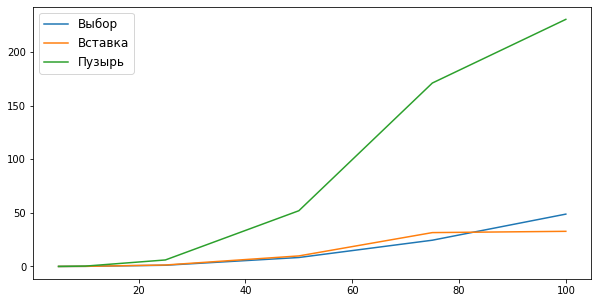

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data,vibor_time,label=r'Выбор')
plt.plot(data,vstavka_time,label=r'Вставка')
plt.plot(data,bubble_time,label=r'Пузырь')
plt.legend(fontsize=12)

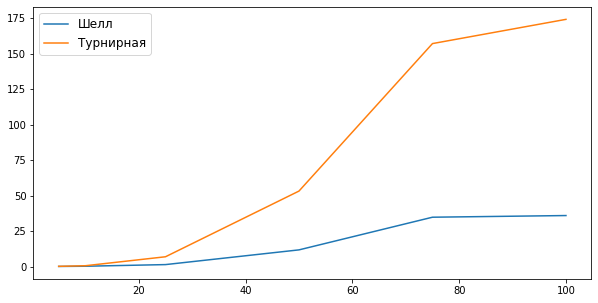

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data,shell_time,label=r'Шелл')
plt.plot(data,tournir_sort,label=r'Турнирная')
plt.legend(fontsize=12)

### Вывод


Различные алгоритмы показывают разные резултаты, при разных входных данных. Это говорит о том, что в разных случаях будут востребованы конкретные алгоритмы. Нашли за сколько обрабатывает матрицу 50 на 50 каждый алгоритм



1.   Выбор (7ms)
2.   Вставка (9ms)
3.   Пузырьком (36ms)
4.   Шелла (10ms)
5.   Быстрая (1ms)
6.   Турнирная (26ms)